# EE 538: Analog Integrated Circuit Design

## Winter 2021

## Instructor: Jason Silver

## Python packages/modules

In [73]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_x2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1, 'b')
    ax.plot(x, y2, 'r')
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def nmos_iv_sweep(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = []
    
    for i in range(len(V_ds)):
        I_d.append(np.piecewise(V_ds[i], [V_ds[i] < V_ov, V_ds[i] >= V_ov],
                       [u_n*C_ox*(W/Leff)*(V_gs - V_thn - V_ds[i]/2)*V_ds[i]*(1+lmda*V_ds[i]) , 
                        0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds[i])])) 
    
    return np.array(I_d)

def pmos_iv_sweep(V_sg, V_sd, W, L, lmda):
    u_p = 100                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thp = -0.8                # threshold voltage (device parameter)
    V_ov = V_sg - np.abs(V_thp)
    Ldp = 0.09e-6
    Leff = L - 2*Ldp
    
    I_d = []
    
    for i in range(len(V_sd)):
        I_d.append(np.piecewise(V_sd[i], [V_sd[i] < V_ov, V_sd[i] >= V_ov],
                       [u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp) - V_sd[i]/2)*V_sd[i]*(1+lmda*V_sd[i]) , 
                        0.5*u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp))**2*(1+lmda*V_sd[i])])) 
    
    return np.array(I_d)

def nmos_iv_sat(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = 0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds)
    
    return I_d

def nmos_diff_pair(V_id, I_ss, R_D, W, L, V_dd):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_dp = I_ss/2 + 0.25*u_n*C_ox*(W/L)*V_id*np.sqrt(4*I_ss/(u_n*C_ox*(W/L)) - V_id**2)
    I_dm = I_ss/2 - 0.25*u_n*C_ox*(W/L)*V_id*np.sqrt(4*I_ss/(u_n*C_ox*(W/L)) - V_id**2)

    return I_dp, I_dm

# Lecture 7 - g<sub>m</sub>/I<sub>D</sub> Design

## Announcements

 - Midterm exam available now, due February 21
     - 180-minute time limit, administered as a Canvas quiz
 - Design Project Phase 1 posted, due Sunday March 7
     - PDF submission on Canvas 

## Week 7

## Overview

 - Last time...
     - MOS capacitance
     - Common source amplifier
     - Miller Effect
     - Zero Value Time Constant (ZVTC) analysis
     - Gain-bandwidth product
 - Today...
     - CMOS amplifier design
     - Subthreshold MOS operation
     - $g_m/I_D$ design methodology

## Amplifier design considerations

 - Analog design involves compromises between
    - Speed (circuit bandwidth)
    - Noise (SNR)
    - Power dissipation (supply current)
    - Size (silicon area)
 - Design typically begins with a target for one or more of these metrics
 - Sometimes, one or more metrics may constitute a degree of freedom (e.g. no noise spec)

## Transistor sizing methodology

 - Other limitations/constraints apply, including supply voltage, input voltage range, and output swing
 - These requirements need to be met while satisfying the core specifications (i.e. power and bandwidth)
 - Every transistor should be sized with these targets in mind (i.e. no random selection of $W/L$ values)
 - Transistor sizes should ideally be determined with little to no “tweaking” in Cadence

## Amplifier design example

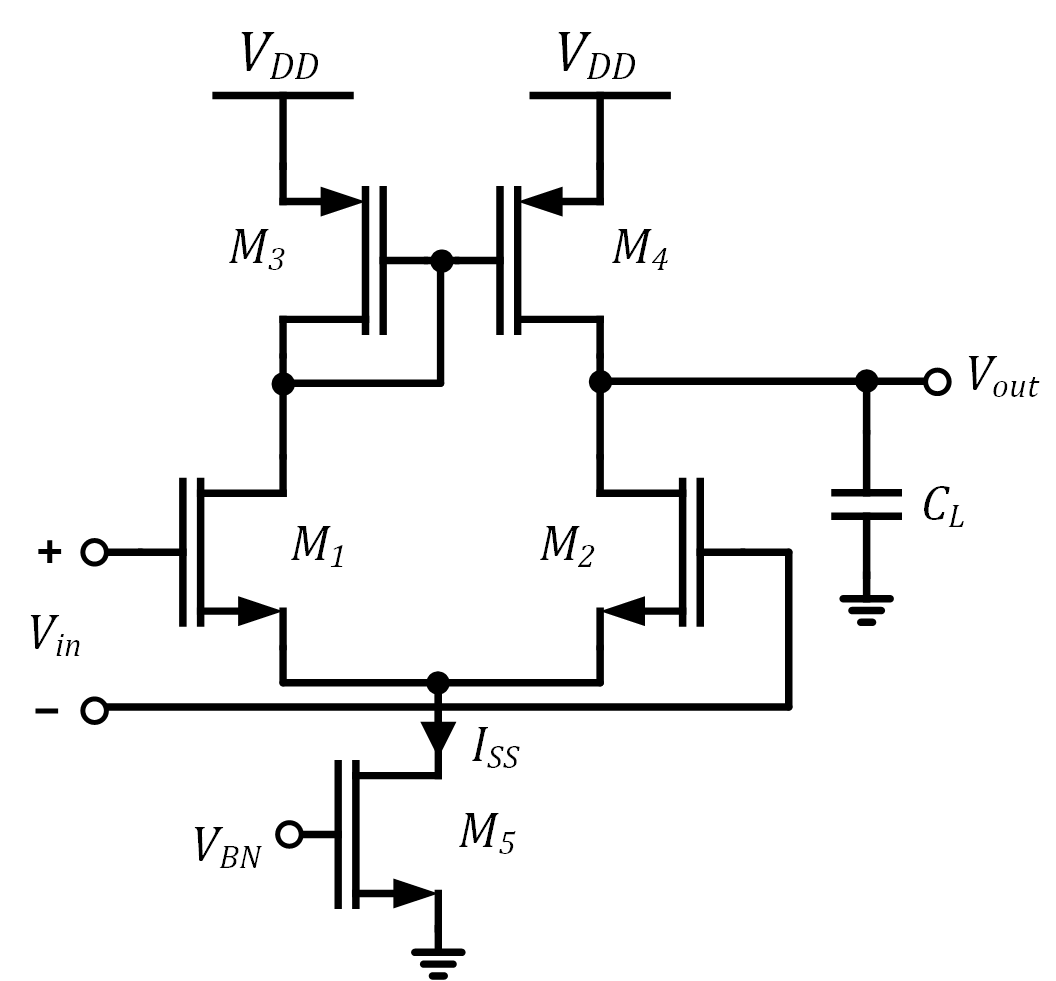

 - Specifications:
 
\begin{equation}
A(j0) \approx -g_{m1,2}r_{o2}||r_{o4}  
\end{equation}

\begin{equation}
\omega_{3dB} = \dfrac{1}{r_{o2}||r_{o4} C_L}
\end{equation}

\begin{equation}
GBW = |A(j0)|\cdot \omega_{3dB} \approx \dfrac{g_{m1,2}}{C_L}
\end{equation}

 - Amplifier bandwidth/power tradeoff:

\begin{equation}
GBW = \dfrac{I_{SS}}{V_{OV1,2}\cdot C_L} = \dfrac{P_{diss}/V_{DD}}{V_{OV1,2}\cdot C_L}
\end{equation}



 - There is a tradeoff between power and bandwidth due to $I_{SS}$ and $C_L$ limitations
 - If both are specified/constrained, design will be a process of optimization (e.g. maximize bandwidth under a given power constraint, or minimize power while meeting bandwidth spec)

## Amplifier design example

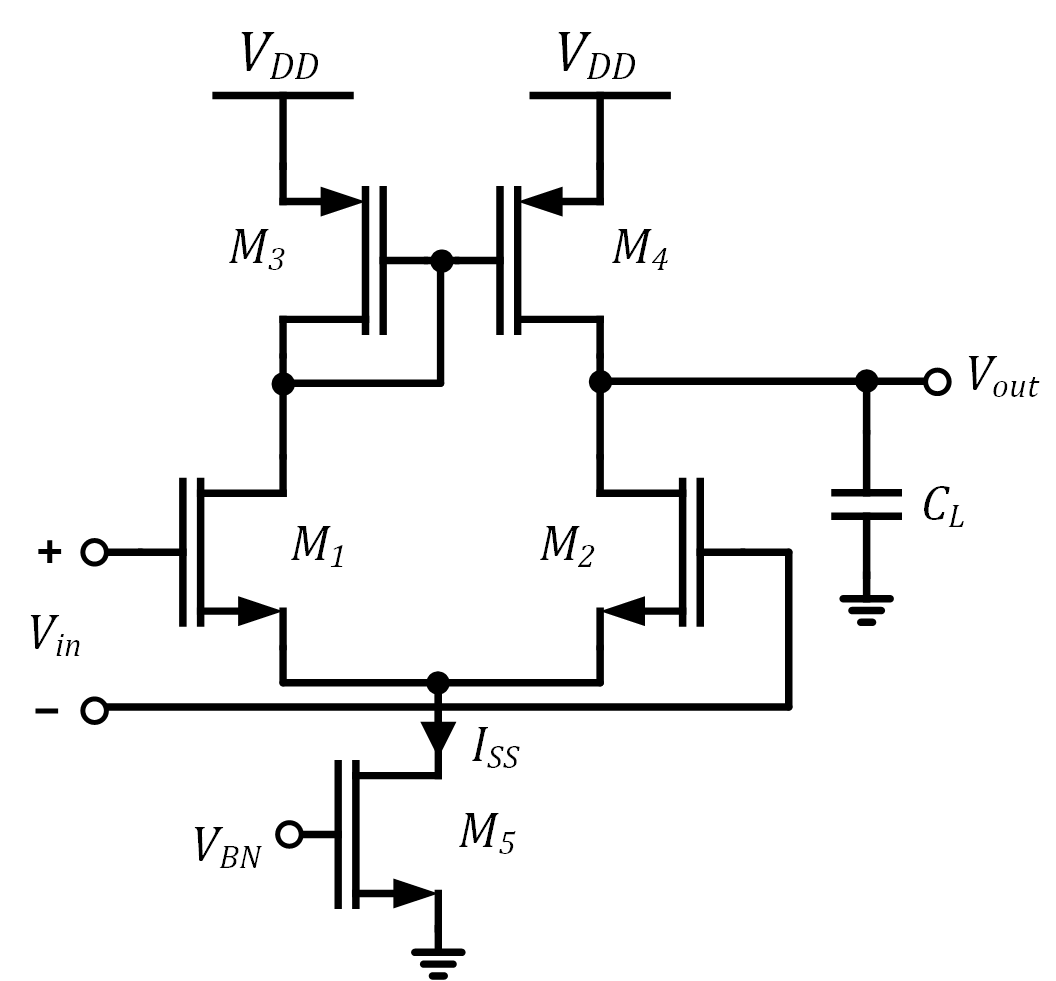

 - Specifications:
 
\begin{equation}
GBW \approx \dfrac{g_{m1,2}}{C_L} \:\:\:\:\:\:\:\:\: P_{diss} =I_{SS}\cdot V_{DD}
\end{equation}

 - Design:
 
\begin{align}
g_{m1,2} &\approx GBW \cdot C_L = \dfrac{I_{SS}}{V_{OV1,2}} \\
\end{align}

\begin{equation}
\left(\dfrac{W}{L}\right)_{1,2} = \dfrac{I_{SS}}{\mu_n C_{ox}V_{OV1,2}^2}
\end{equation}

 - $V_{DD}$, $C_L$, and $P_{diss}$ are set by either specifications or technology limitations
 - $M_{1,2}$ should be sized based on the required overdrive voltage
 - Selection of $I_{SS}$ and sizing of $M_1$, $M_2$ follows directly from specifications

## Long-channel model limitations

 - Unfortunately, modern “short-channel” devices do not obey long-channel equations
 - Starting with these equations typically leads to an iterative, *simulate-and-repeat* process, which is counter to our goal of “no tweaking”
 - We would like to
    - Follow a reasonably simple design approach requiring minimal hand analysis, and
    - Obtain accurate results with little to no iteration (i.e. right the first time)
 - It turns out that this is largely possibly through an approach called $g_m/I_D$ design 

## Amplifier design, revisited

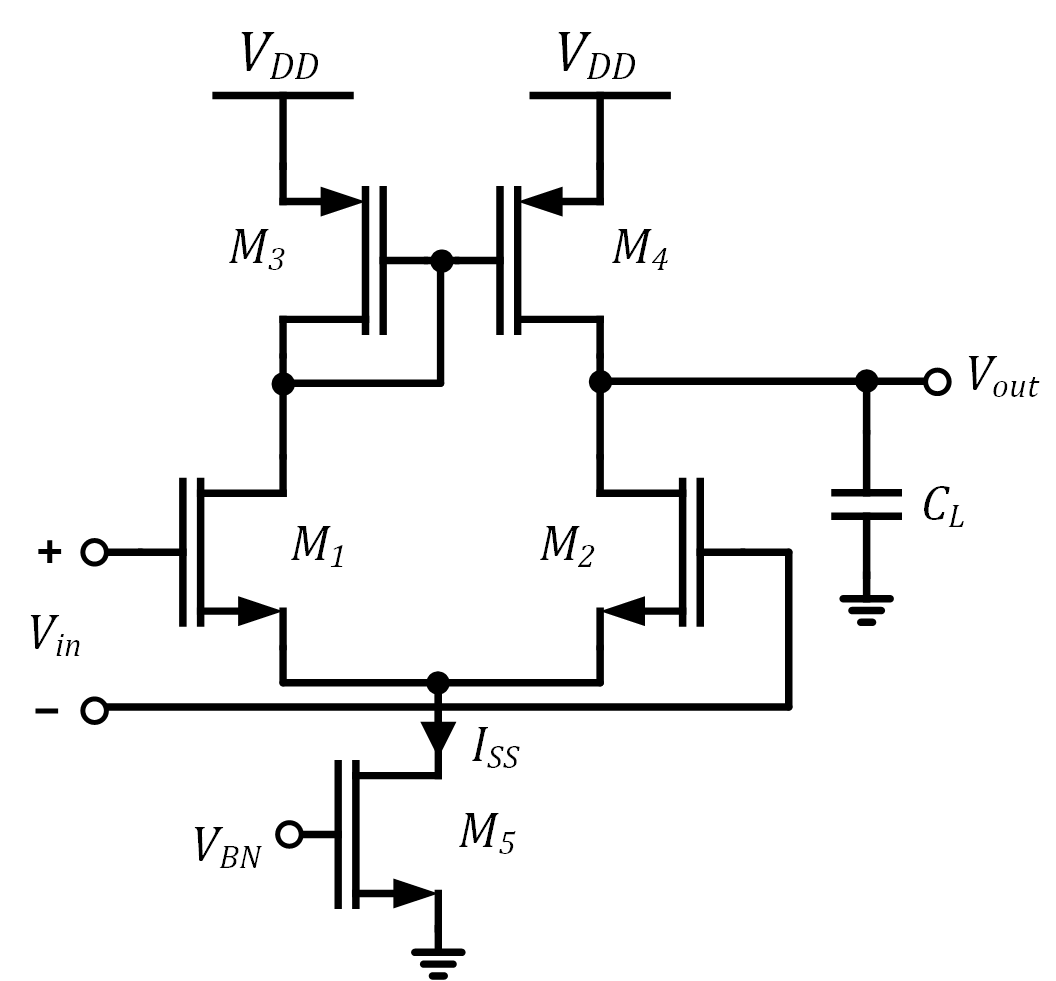

 - Specifications:
 
\begin{equation}
GBW \approx \dfrac{g_{m1,2}}{C_L} \:\:\:\:\:\:\:\:\: P_{diss} =I_{SS}\cdot V_{DD}
\end{equation}

 - Required value of $g_m/I_D$:
 
\begin{align}
\dfrac{g_m}{I_D} &\approx \dfrac{2\cdot GBW \cdot C_L}{I_{SS}} = \dfrac{2}{V_{OV}}
\end{align}

 - Viewing specifications in terms of transconductance efficiency ($g_m/I_D$) provides a model- and operating region-agnostic approach to design and sizing
 - However, $g_m/I_D$ depends on process technology and operating region, making the simple square-law MOS model inaccurate in many cases
 - From the above expression for $g_m/I_D$, it seems like we can just continue decreasing $V_{OV}$ to obtain inifinitely higher transconductance efficiency values!

## Subthreshold MOS operation

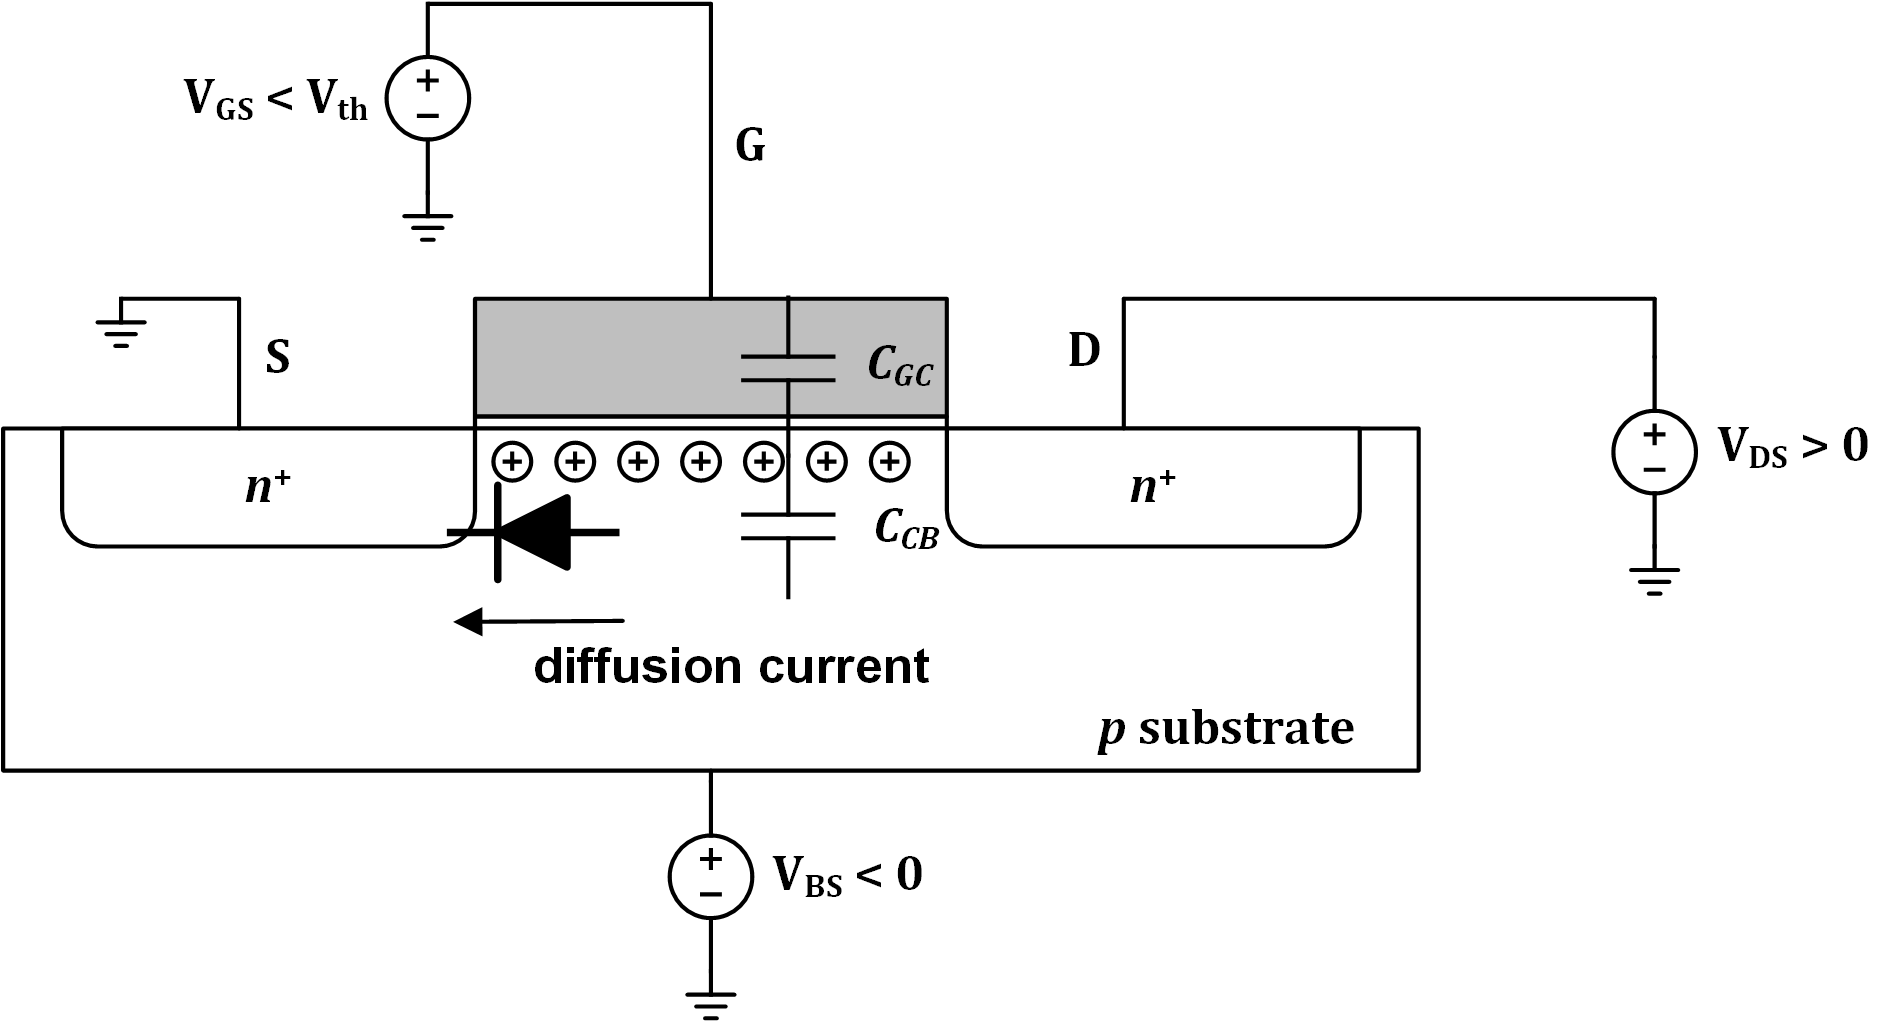

 - Subthreshold drain current
 
\begin{equation}
I_D = I_S \exp^{\dfrac{V_{GS}}{\zeta V_T}}
\end{equation}

 - where
 
\begin{equation}
\zeta = \dfrac{C_{GC} + C_{CB}}{C_{GC}}
\end{equation}

 - As $V_{OV}$ decreases, $V_{GS}$ becomes equal to/less than $V_{th}$
 - For $V_{GS}$ values less than $V_{th}$, the bulk region under the gate has a high concentration of majority carriers (holes for NMOS)
 - Increasing/decreasing the gate potential in this regime lowers/raises the potential barrier for diffusion of majority carriers between the S/B regions (this is similar to BJT operation)
 - $\zeta$ is a process parameter, typically in the range 1.5 to 2

## Subthreshold transconductance

 - For subthreshold operation (also called weak inversion), transconductance is given as
 
\begin{equation}
g_m =\dfrac{\partial I_D}{\partial V_{GS}} = \dfrac{\partial}{\partial V_{GS}} I_S \exp^{\dfrac{V_{GS}}{\zeta V_T}} = \dfrac{I_S \exp^{\dfrac{V_{GS}}{\zeta V_T}}}{\zeta V_T} = \boxed{ \dfrac{I_D}{\zeta V_T}}
\end{equation}

 - This an analogous expression to the transconductance of a $BJT$, with the exception of the $\zeta$ term
 - As in the square-law model, transconductance varies linearly with $I_D$
 - Both drain current and transconductance are in fact continuous functions of $V_{GS}$, and the models merely serve as approximations
 - It should be noted that the accuracy of both square law and exponential models is poor for $V_{GS} \approx V_{th}$

## Transconductance efficiency (g<sub>m</sub>/I<sub>D</sub>)

 - In saturation, the transconductance is given by 

\begin{equation}
g_m = \dfrac{2I_D}{V_{OV}}
\end{equation}

 - From this we can define the transconductance efficiency, given by

\begin{equation}
\dfrac{g_m}{I_D} = \dfrac{2}{V_{OV}}
\end{equation}

 - For a MOS transistor in subthreshold, this becomes

\begin{equation}
\dfrac{g_m}{I_D} = \dfrac{1}{\zeta V_T}
\end{equation}

 - At room temperature ($300K$) for $\zeta \approx 1.5$, this is limited to approximately
 
\begin{equation}
\dfrac{g_m}{I_D} \approx 26 S/A
\end{equation}


## g<sub>m</sub>/I<sub>D</sub> design example

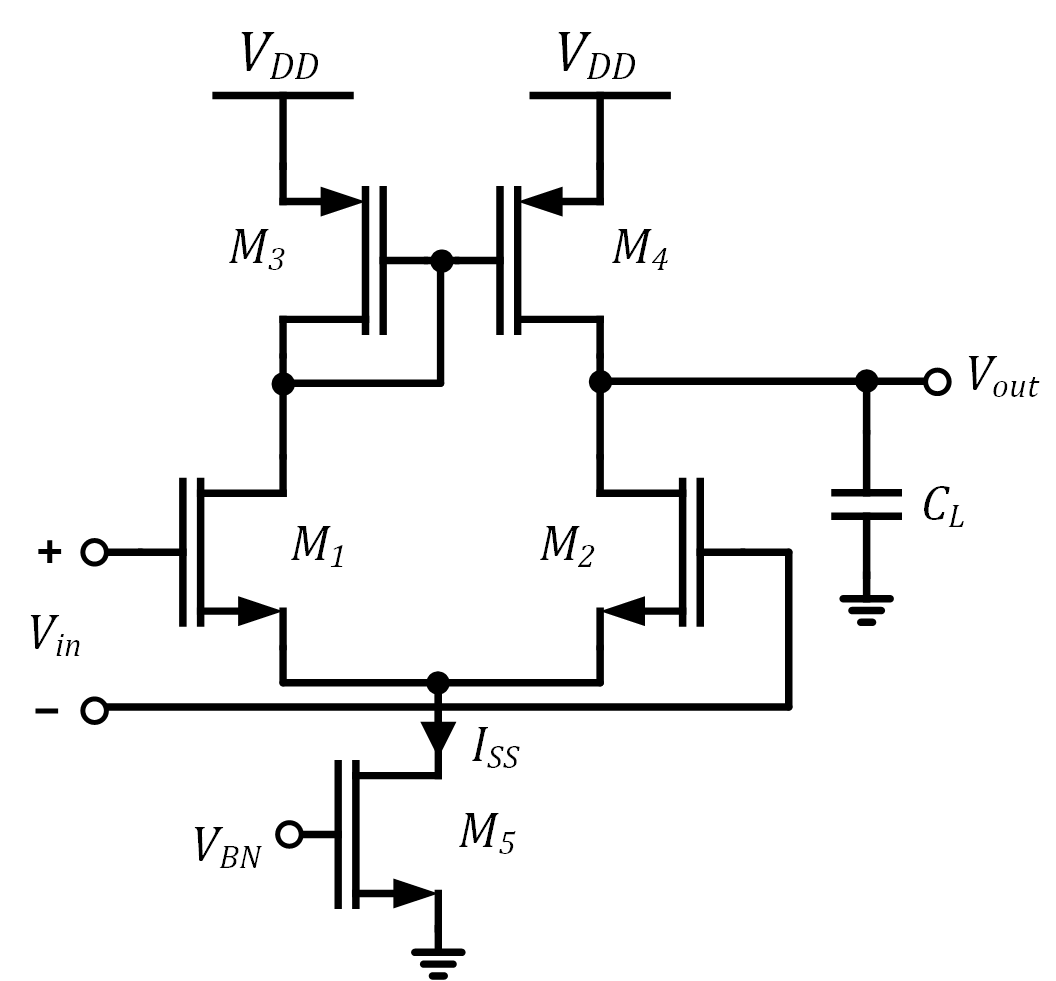

 - Specifications:
 
\begin{equation}
V_{DD} = 2.5V \:\:\:\:\:\:\:\: C_L = 10pF \\
P_{diss} =  320\mu W \:\:\:\:\:\:\:\: GBW = 10MHz 
\end{equation}

 - Design calculations:

\begin{equation}
I_{D1,2} = \dfrac{P_{diss}}{2V_{DD}} = 64 \mu A
\end{equation}

\begin{equation}
g_{m1,2} = 2 \pi \cdot 10MHz \cdot 10 pF = 630 \mu S
\end{equation}

\begin{equation}
\dfrac{g_{m}}{I_{D}} = \dfrac{630 \mu S}{64 \mu A} \approx 10V^{-1}
\end{equation}

## g<sub>m</sub>/I<sub>D</sub> current density chart

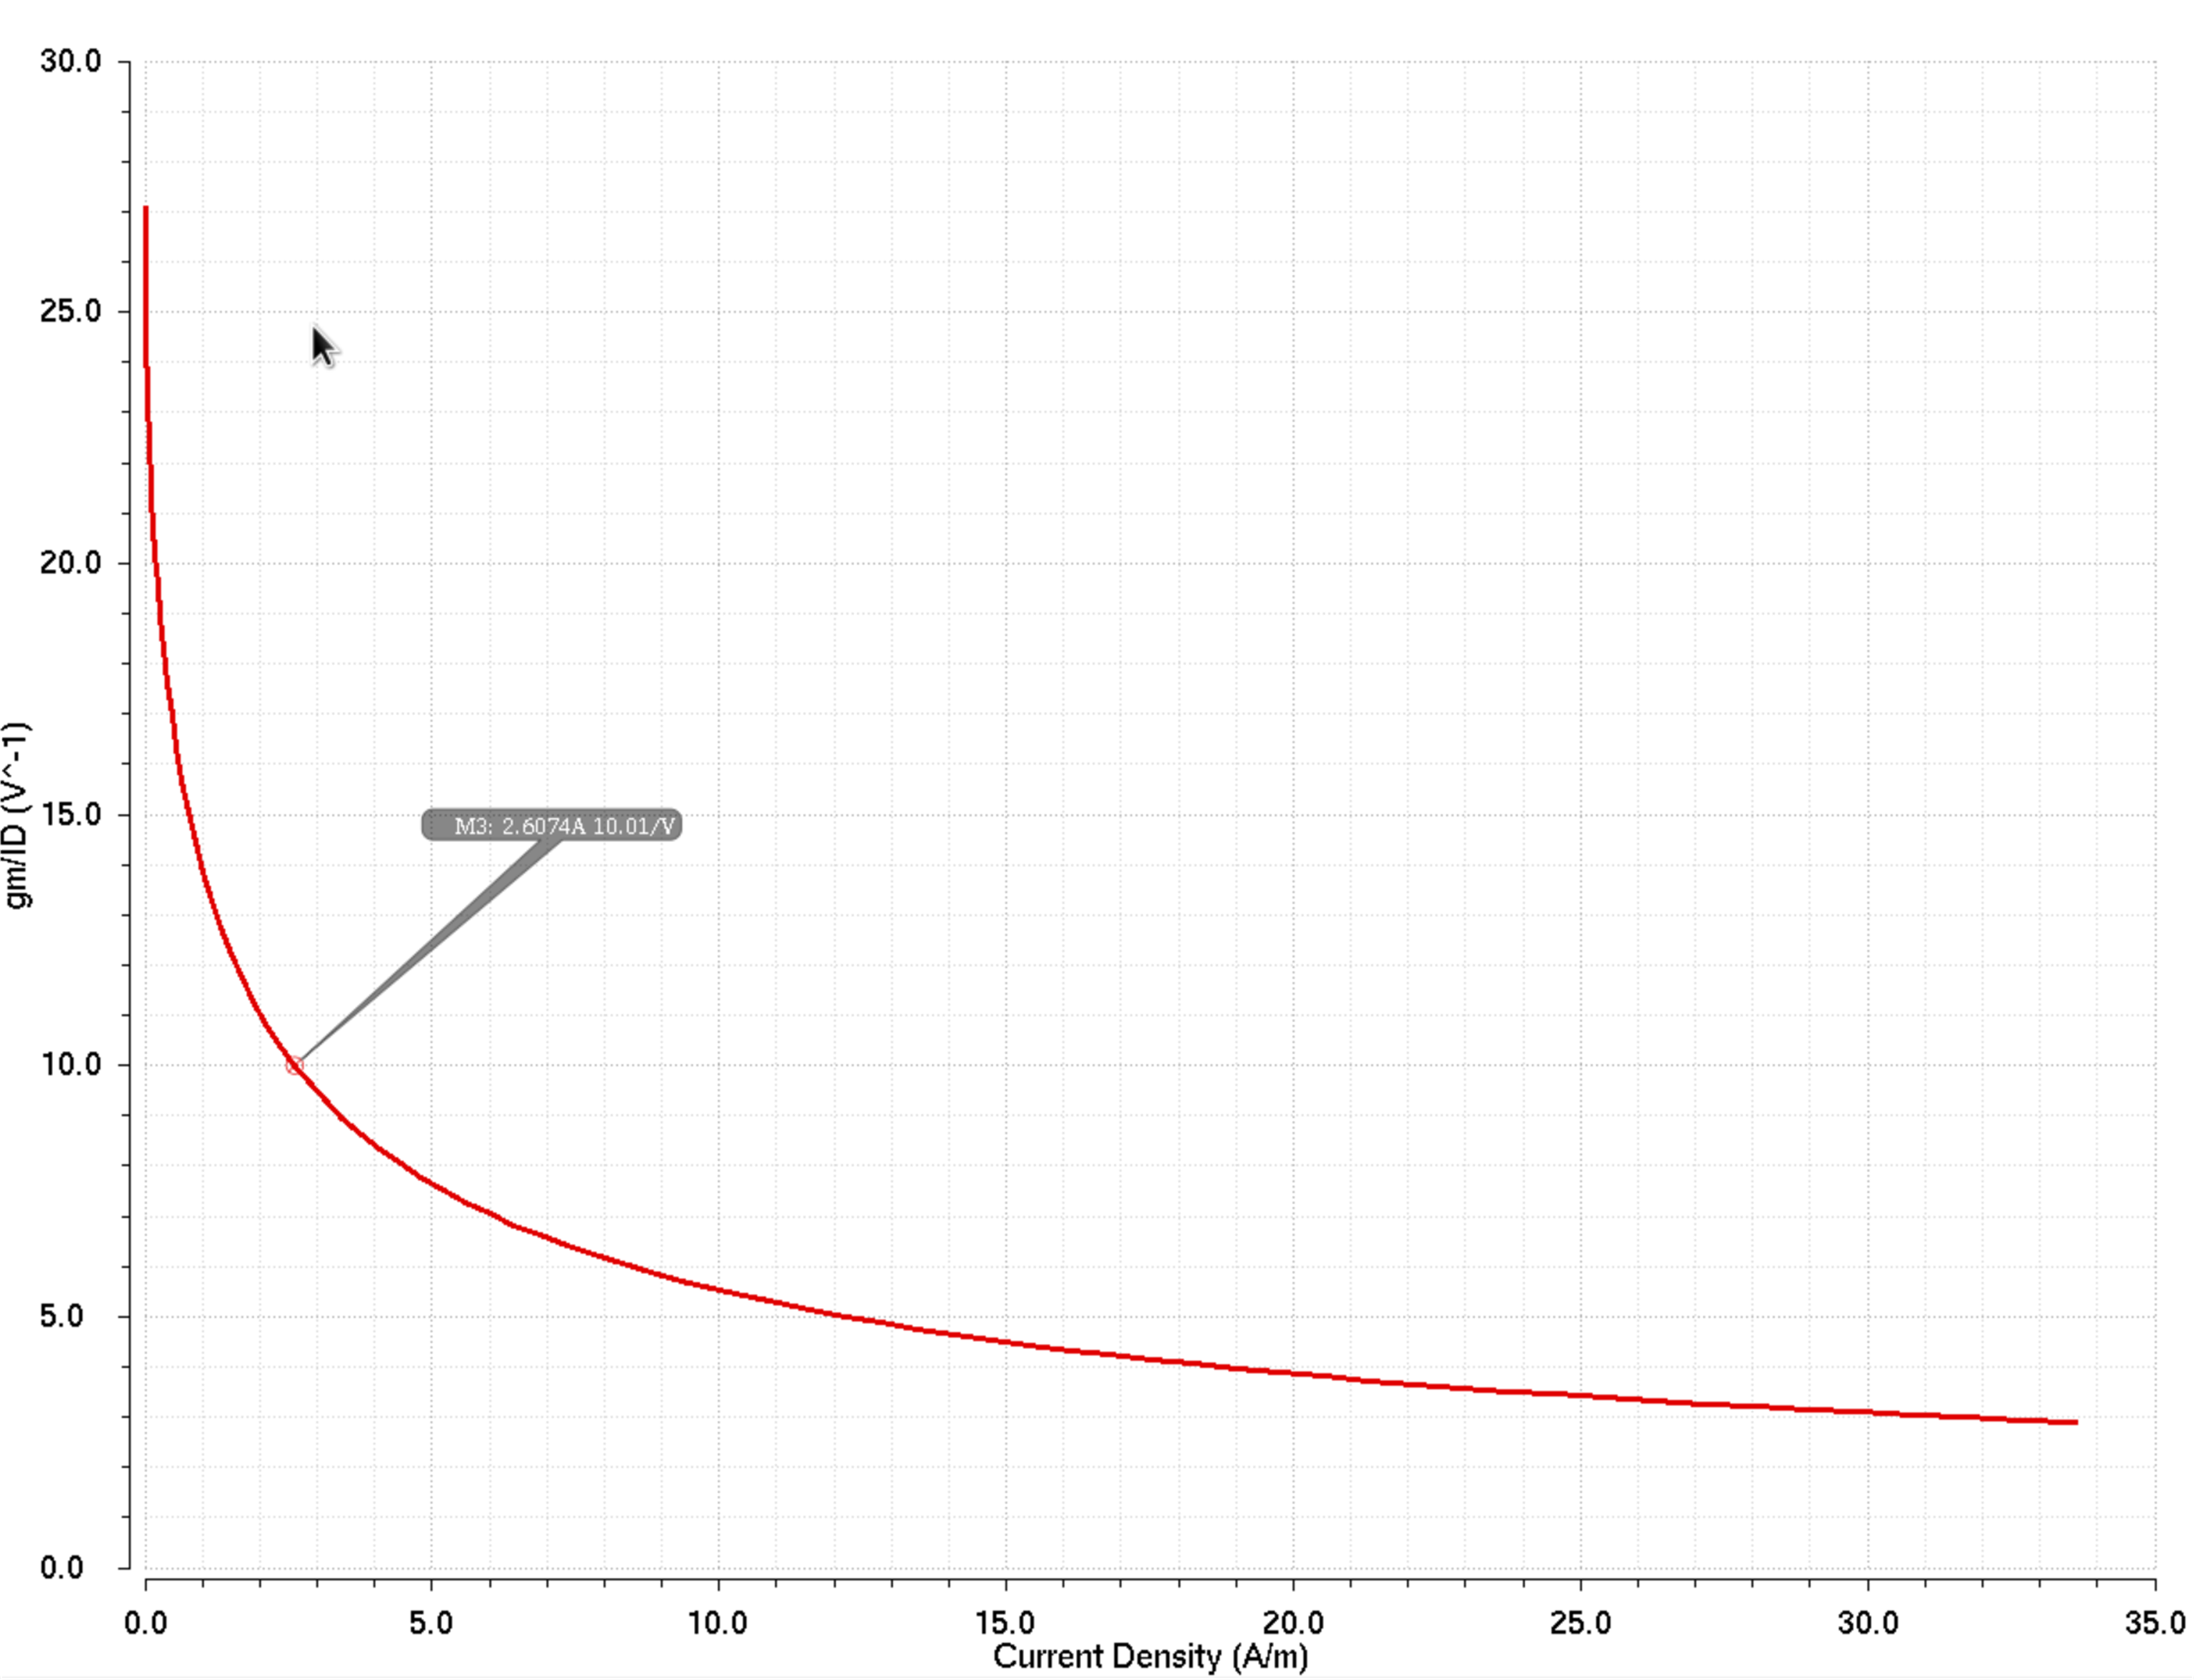

## Input pair sizing

 - The allowable current for $M_{1,2}$ is based on the power dissipation spec:
 
\begin{equation}
I_{D1,2} = \dfrac{P_{diss}}{2V_{DD}} = 64 \mu A
\end{equation}

 - The current density chart allows us to directly select $W$ based on the target $g_m/I_D$ and the target drain current $I_{D1,2}$
 
\begin{equation}
W_{1,2} = \dfrac{I_{D1,2}}{I_D/W} = \dfrac{64\mu A}{2.6 \mu A/\mu m} = 25.6 \mu m
\end{equation}

- We can use the same approach to size bias devices in terms of $V_{OV}$ with the corresponding charts (e.g. $V_{OV}$ vs $I_D/W$)

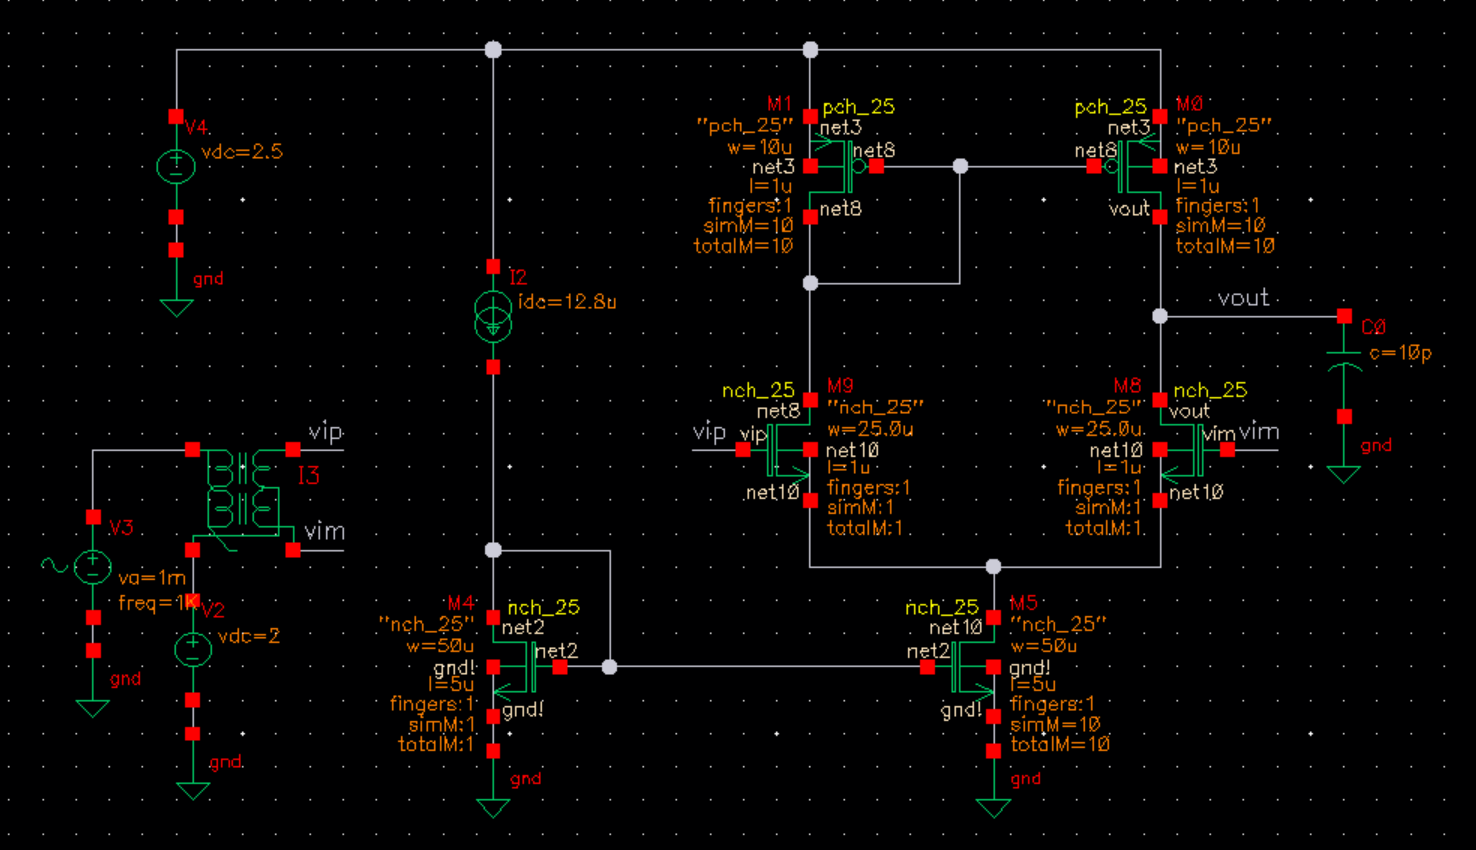

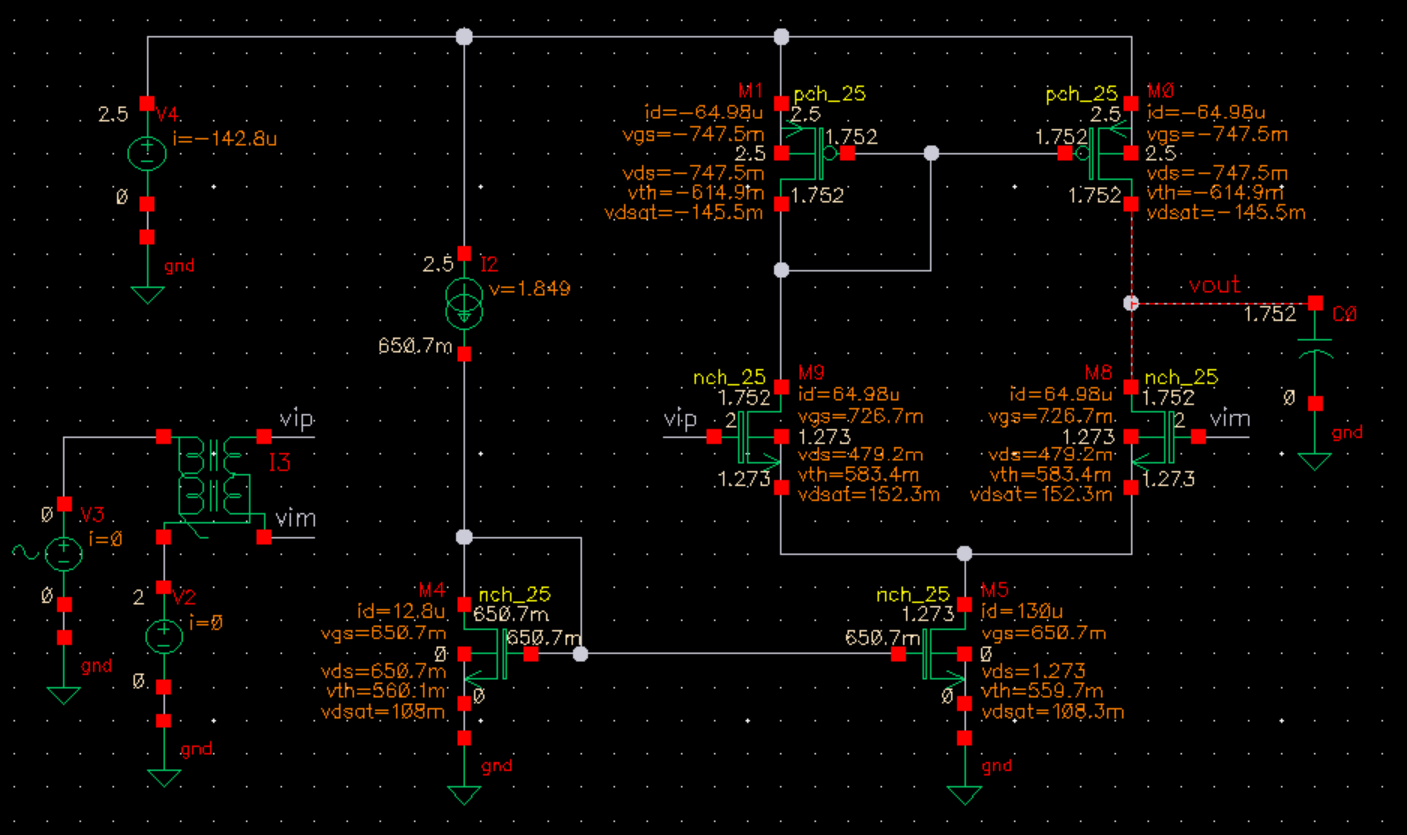

## Simulation results

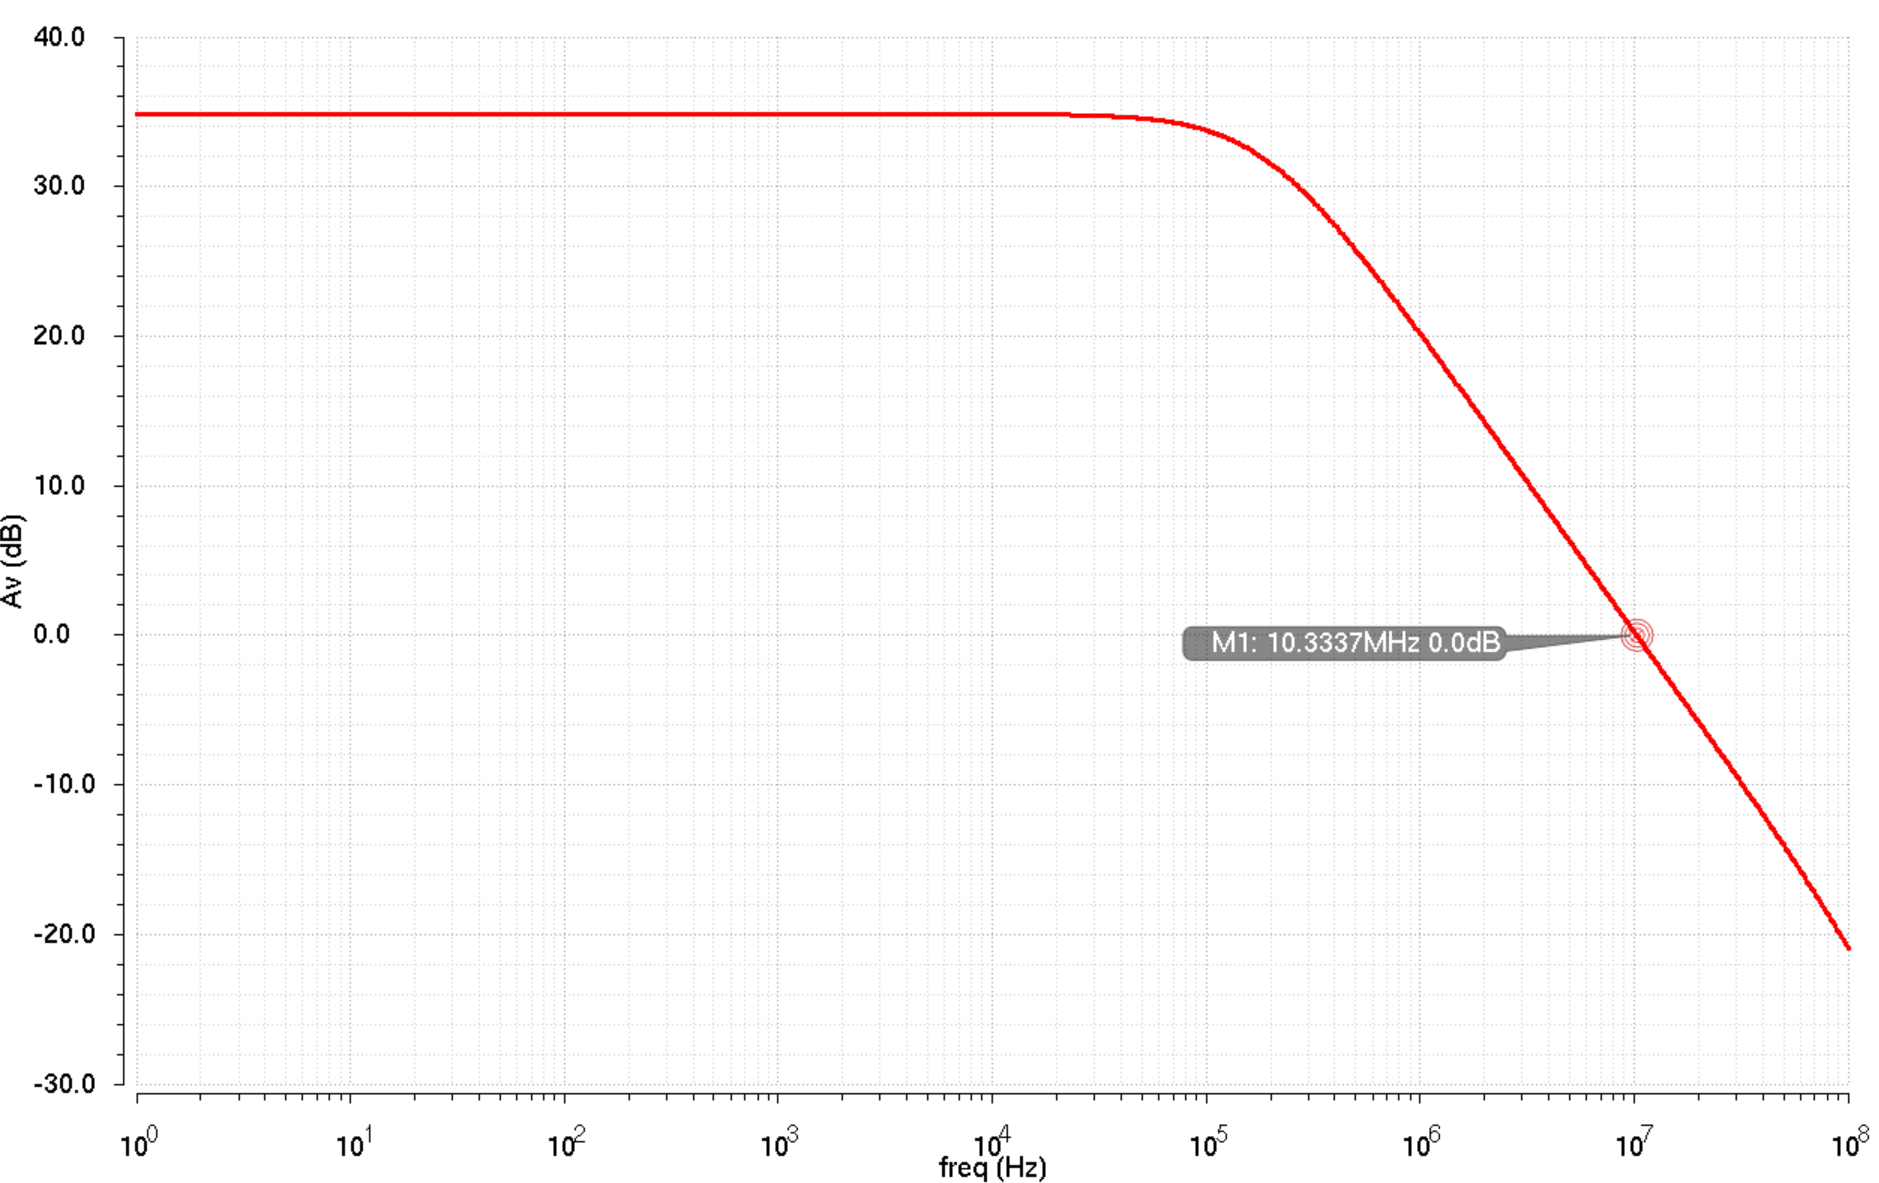

## g<sub>m</sub>/I<sub>D</sub> design results

 - Our design is essentially right on target, with little to no need for tweaking
 - This result was achieved without using any of the long-channel equations
 - Much less model uncertainty, since the model complexity is “built in” to the $g_m/I_D$ chart generated by simulation
 - $g_m/I_D$ design enables the designer to think in terms of transconductance efficiency and current density, improving intuition relative to an equation-based approach

## General design flow

 - Determine the required value(s) of $g_m$, $g_m r_o$, or $V_{OV}$ from design objectives (e.g. bandwidth, gain, output swing)
 - Select channel length $L$
    - Short channel $\rightarrow$ high $f_T$ (high speed)
    - Long channel $\rightarrow$ high intrinsic gain, good matching
 - Determine required value of $g_m/I_D$
    - Large $g_m/I_D$ $\rightarrow$ low power or large signal swing (low $V_{OV}$)
    - Small $g_m/I_D$ $\rightarrow$ high speed, better linearity
 - Determine $I_D$ from $g_m$ and $g_m/I_D$
 - Determine $W$ from current density ($I_D/W$) chart

## Summary

 - Analog CMOS design can (and should) be a systematic process 
     - Specifications $\rightarrow$ circuit architecture $\rightarrow$ device currents/sizes
 - The long-channel MOS model is inadequate for accurately predicting device behavior in short-channel CMOS technologies or at low current densities (subthreshold)
 - $g_m/I_D$ design offers a unified approach that captures complex device model behavior while still allowing the use of simple expressions for making design decisions